In [1]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Requried Modules
import numpy as np
import pandas as pd
pd.options.display.max_rows = 999

In [3]:
#Read Training Data
train = pd.read_csv('bigmart_train.csv')

## -------------------Exploratory Data Analysis----------------------------

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train.shape

(8523, 12)

In [6]:
train.size

102276

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#from the 12 features, 5 are numeric and 7 categorical.

In [35]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [36]:
catagorical_features = train.select_dtypes(include=[np.object])
catagorical_features.dtypes

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

### Numerical Features

In [38]:
train.describe() #(include='all')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
# Min Value of Item_Visiblity is Zero !!

In [40]:
train.apply(lambda x : len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

### Categorical variables

In [43]:
#Filter categorical variables
categorical_columns = [x for x in train.dtypes.index if train.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Outlet_Identifier']]
#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (train[col].value_counts())


Frequency of Categories for varible Item_Identifier
FDG33    10
FDW13    10
NCQ06     9
FDV60     9
NCL31     9
         ..
FDK57     1
DRF48     1
FDE52     1
FDO33     1
FDT35     1
Name: Item_Identifier, Length: 1559, dtype: int64

Frequency of Categories for varible Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Frequency of Categories for varible 

In [12]:
## Grouping Operations _ More Insights

In [48]:
print("Sales in Each Outlet Location")
train.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean()

Sales in Each Outlet Location


Outlet_Location_Type
Tier 1    1876.909159
Tier 2    2323.990559
Tier 3    2279.627651
Name: Item_Outlet_Sales, dtype: float64

In [49]:
print("Sales in Item_Type:")
train.groupby('Item_Type')['Item_Outlet_Sales'].mean()

Sales in Item_Type:


Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

In [51]:
print("Sales in Outlet_Type:")
train.groupby('Outlet_Type')['Item_Outlet_Sales'].mean()

Sales in Outlet_Type:


Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [16]:
def groupPrice(price):
    if price < 1000:
        return "Low Sales"
    elif price >=1000 and price < 2000:
        return "Average Sales"
    else:
        return "High Sales"

In [17]:
Sales_group =train.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().apply(groupPrice)

In [18]:
Sales_group

Outlet_Type
Grocery Store            Low Sales
Supermarket Type1       High Sales
Supermarket Type2    Average Sales
Supermarket Type3       High Sales
Name: Item_Outlet_Sales, dtype: object

In [19]:
train.groupby(['Outlet_Location_Type','Outlet_Type','Item_Type']).agg(mean_MRP=('Item_MRP',np.mean),
                                               mean_Sales=('Item_Outlet_Sales',np.mean))

mean_MRP  \
Outlet_Location_Type Outlet_Type       Item_Type                           
Tier 1               Grocery Store     Baking Goods           126.018270   
                                       Breads                 137.498225   
                                       Breakfast              128.258620   
                                       Canned                 145.491563   
                                       Dairy                  139.417992   
                                       Frozen Foods           130.421502   
                                       Fruits and Vegetables  145.667551   
                                       Hard Drinks             96.349875   
                                       Health and Hygiene     132.363060   
                                       Household              158.846638   
                                       Meat                   139.276294   
                                       Others                 130.918165   
                                       Seafood                135.351267   
                                       Snack Foods            142.374464   
                                       Soft Drinks            141.168531   
                                       Starchy Foods          169.238200   
                     Supermarket Type1 Baking Goods           123.895787   
                                       Breads                 148.727376   
                                       Breakfast              124.694304   
                                       Canned                 136.838705   
                                       Dairy                  147.974505   
                                       Frozen Foods           137.987594   
                                       Fruits and Vegetables  149.591898   
                                       Hard Drinks            131.054384   
                                       Health and Hygiene     131.745263   
                                       Household              148.351508   
                                       Meat                   138.061407   
                                       Others                 143.882841   
                                       Seafood                158.062831   
                                       Snack Foods            147.237603   
                                       Soft Drinks            127.128632   
                                       Starchy Foods          148.197494   
Tier 2               Supermarket Type1 Baking Goods           126.258343   
                                       Breads                 137.639740   
                                       Breakfast              151.478131   
                                       Canned                 143.355646   
                                       Dairy                  148.667932   
                                       Frozen Foods           139.873045   
                                       Fruits and Vegetables  143.529772   
                                       Hard Drinks            136.023644   
                                       Health and Hygiene     130.002942   
                                       Household              150.739074   
                                       Meat                   143.833074   
                                       Others                 136.423408   
                                       Seafood                134.199373   
                                       Snack Foods            144.465599   
                                       Soft Drinks            131.183404   
                                       Starchy Foods          143.834894   
Tier 3               Grocery Store     Baking Goods           126.867862   
                                       Breads                 154.880776   
                                       Breakfast              167.880733   
                                    

## --------------------------EDA - Visuvilazation---------------------------

## Univariate Analysis

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")

<h5>Target Variable - Item Outlet Sales - Distribution</h5>

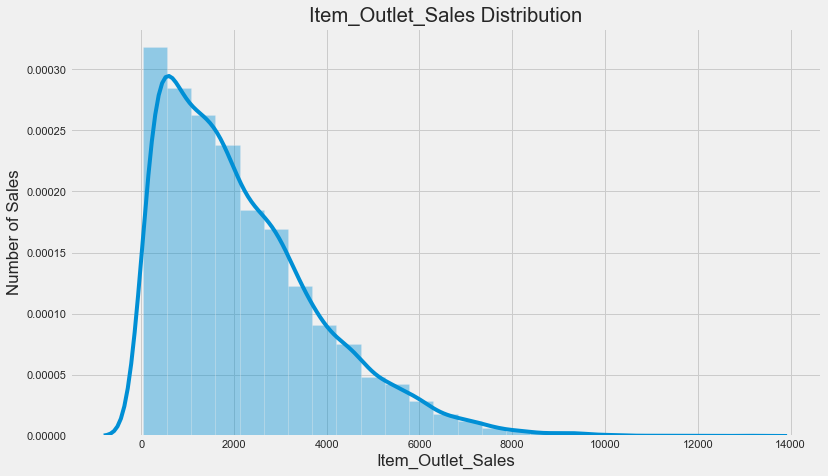

In [54]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(train.Item_Outlet_Sales, bins = 25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")
plt.savefig('Item_Outlet_Sales Distribution.png')

In [22]:
print ("Skew is:", train.Item_Outlet_Sales.skew())

Skew is: 1.1775306028542798


<h3>Independent Variables</h3>

<h4>Numerical Variables</h4>

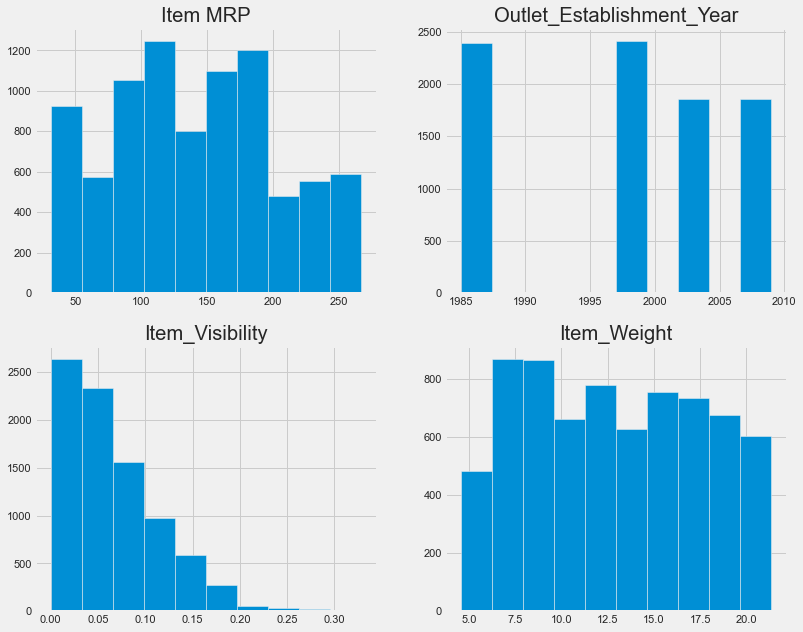

<Figure size 432x288 with 0 Axes>

In [91]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.hist(train['Item_MRP'])
plt.title('Item MRP')

plt.subplot(2,2,2)
plt.hist(train['Outlet_Establishment_Year'])
plt.title('Outlet_Establishment_Year')


plt.subplot(2,2,3)
plt.hist(train['Item_Visibility'])
plt.title('Item_Visibility')

plt.subplot(2,2,4)
plt.hist(train['Item_Weight'])
plt.title('Item_Weight')

plt.show()
plt.savefig('Distribution of the Numerical Features.jpeg')

<h4>Categorical Variables</h4>

<h5>Distribution of the Item_Fat_Content</h5>

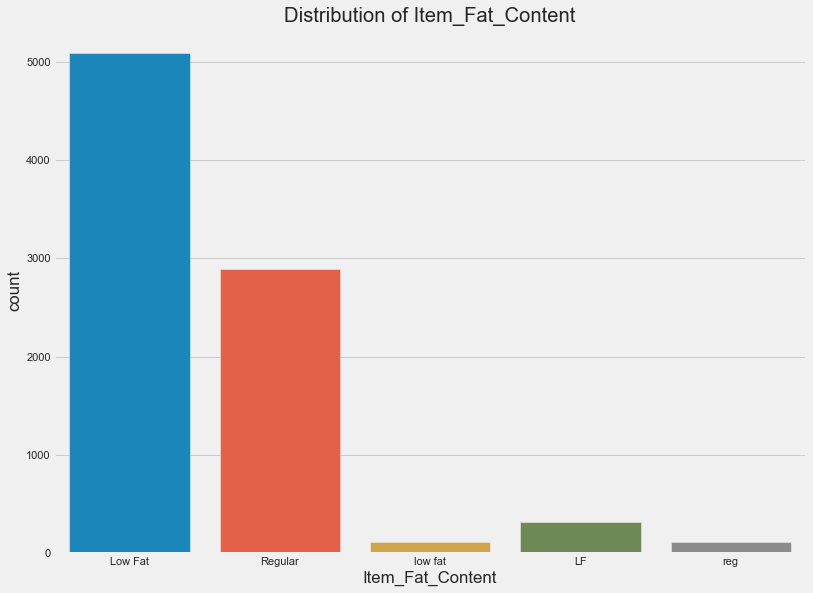

In [85]:
plt.figure(figsize=(12,9))
sns.countplot(train.Item_Fat_Content)
plt.title("Distribution of Item_Fat_Content")
plt.savefig('Item_Fat_Content.png')

<h5>Distribution of the Item_Type</h5>

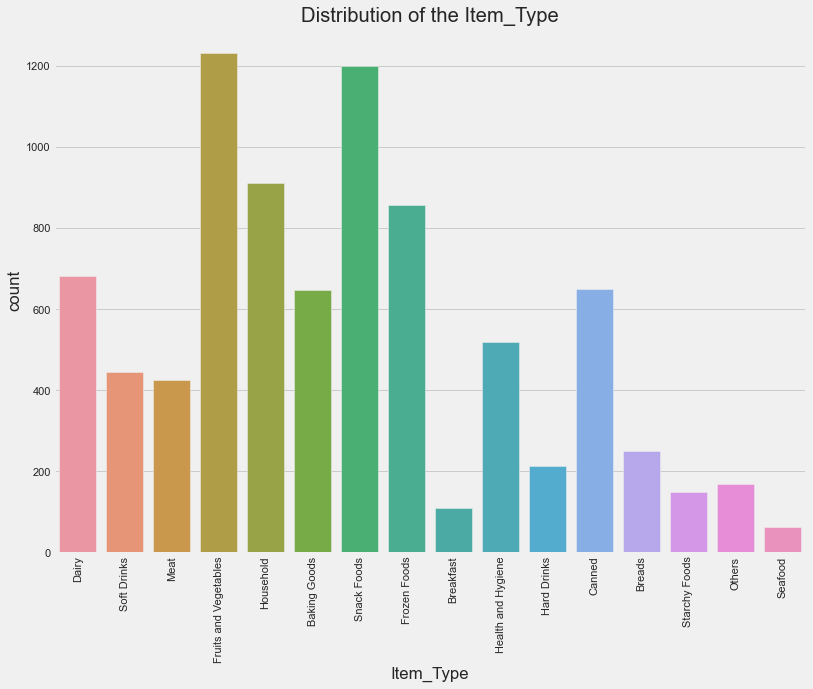

In [84]:
plt.figure(figsize=(12,9))
sns.countplot(train.Item_Type)
plt.title("Distribution of the Item_Type")
plt.xticks(rotation=90)
plt.savefig('Distribution of the Item_Type.jpeg')

<h5>Distribution of the Outlet_Size</h5>

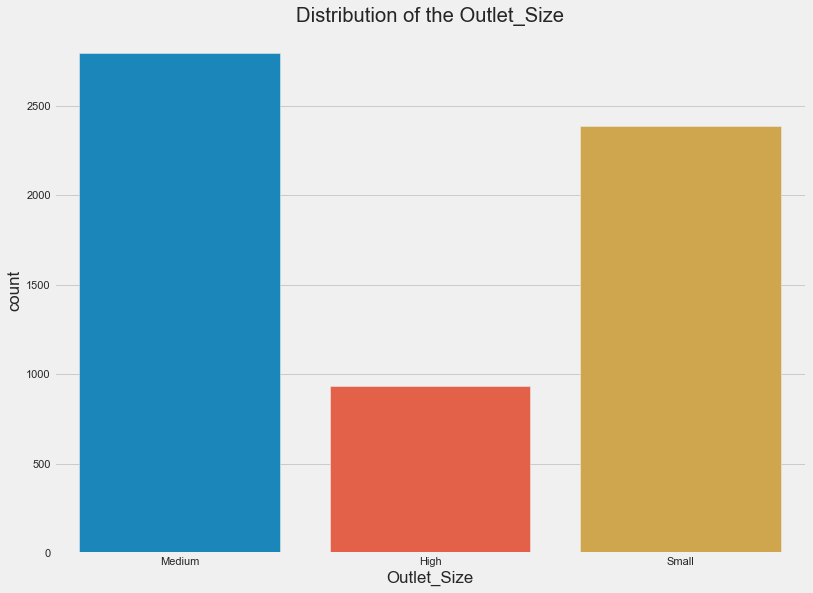

In [87]:
plt.figure(figsize=(12,9))
sns.countplot(train.Outlet_Size)
plt.title("Distribution of the Outlet_Size")
plt.savefig('Distribution of the Outlet_Size.png')

<h5>Distribution of the Outlet_Location_Type</h5>

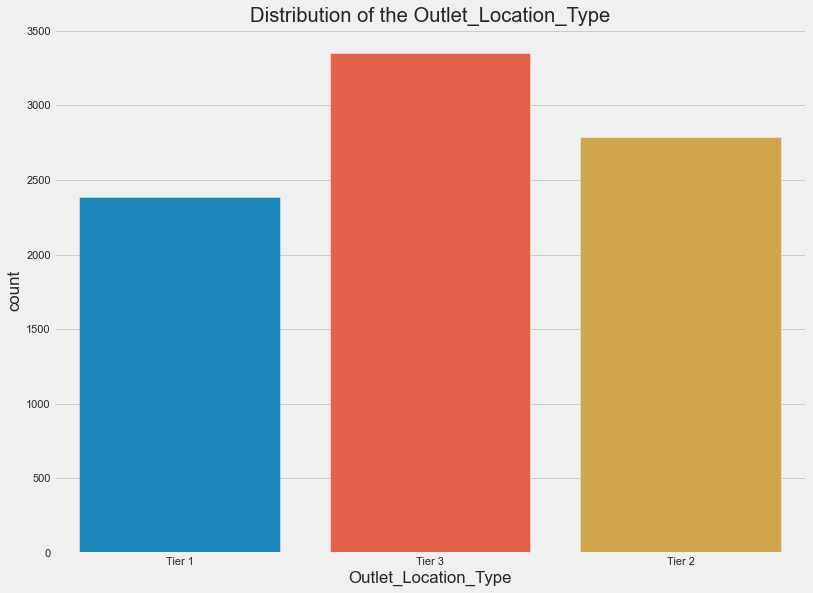

In [88]:
plt.figure(figsize=(12,9))
sns.countplot(train.Outlet_Location_Type)
plt.title("Distribution of the Outlet_Location_Type")
plt.savefig('Distribution of the Outlet_Location_Type.png')

## Bivariate Analysis 

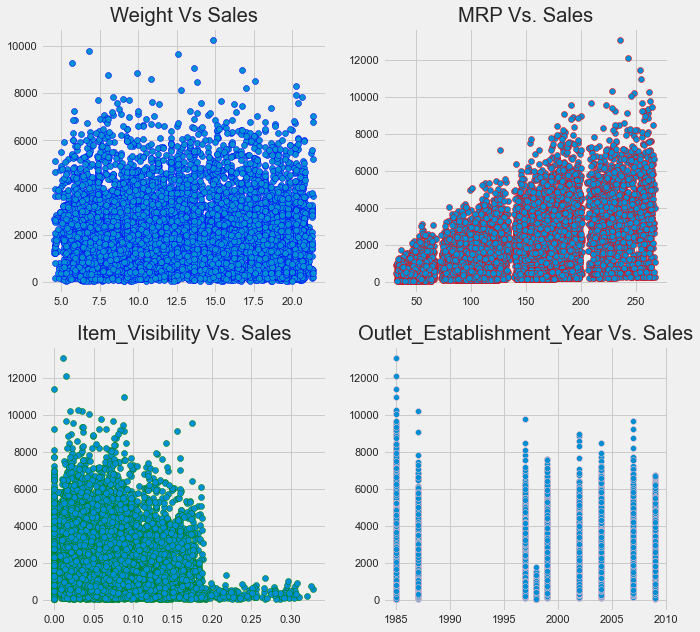

In [96]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(train['Item_Weight'],train['Item_Outlet_Sales'], edgecolors='blue')
plt.title('Weight Vs Sales')

plt.subplot(2,2,2)
plt.scatter(train['Item_MRP'],train['Item_Outlet_Sales'], edgecolors='red')
plt.title('MRP Vs. Sales')

plt.subplot(2,2,3)
plt.scatter(train['Item_Visibility'],train['Item_Outlet_Sales'], edgecolors='green')
plt.title('Item_Visibility Vs. Sales')

plt.subplot(2,2,4)
plt.scatter(train['Outlet_Establishment_Year'],train['Item_Outlet_Sales'], edgecolors='pink')
plt.title('Outlet_Establishment_Year Vs. Sales')

plt.show()

In [ ]:
#Interpetation - Their is linear relationship between MRP and Sales
#Sales of products whose visibility is less than 2 have more sales

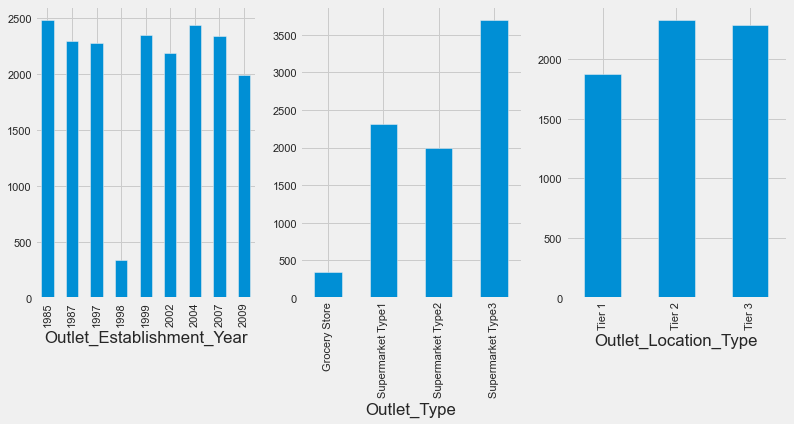

In [106]:
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
train.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()


plt.subplot(1,3,2)
train.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().plot.bar()


plt.subplot(1,3,3)
train.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().plot.bar()


plt.show()

<AxesSubplot:xlabel='Outlet_Identifier'>

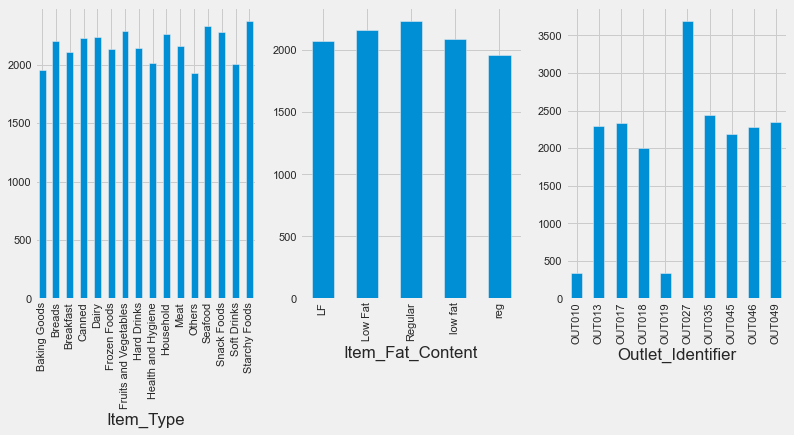

In [108]:
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
train.groupby('Item_Type')['Item_Outlet_Sales'].mean().plot.bar()


plt.subplot(1,3,2)
train.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean().plot.bar()

plt.subplot(1,3,3)
train.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().plot.bar()


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

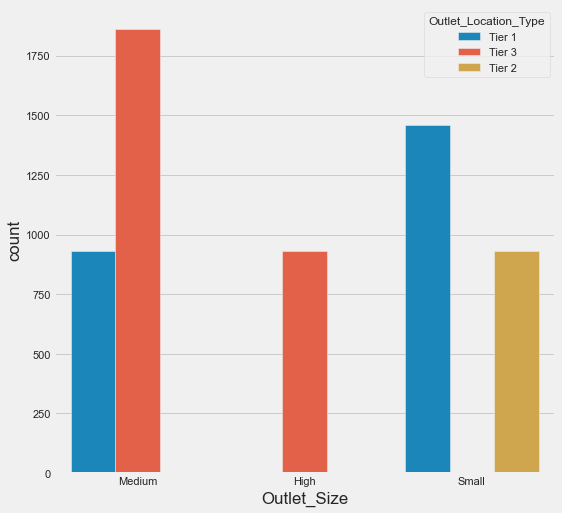

In [98]:
plt.figure(figsize=(8,8))
sns.countplot(x ='Outlet_Size',hue='Outlet_Location_Type', data = train)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

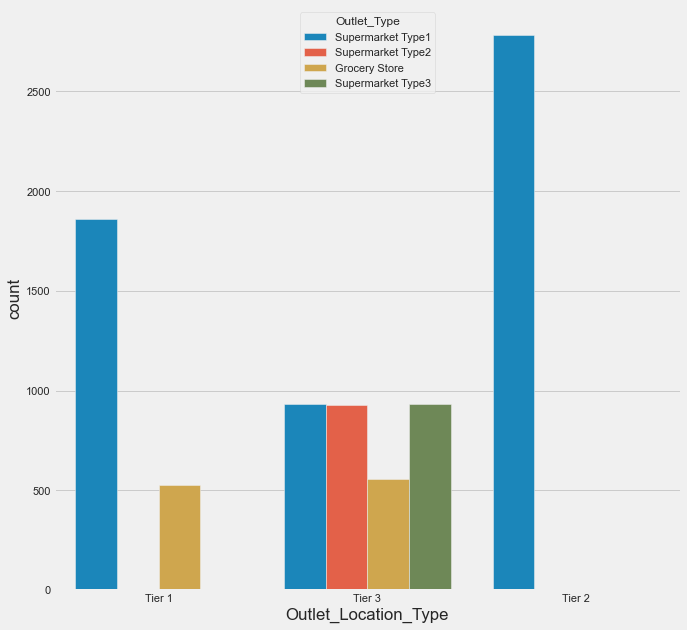

In [27]:
plt.figure(figsize=(10,10))
sns.countplot(x ='Outlet_Location_Type',hue='Outlet_Type', data = train)

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

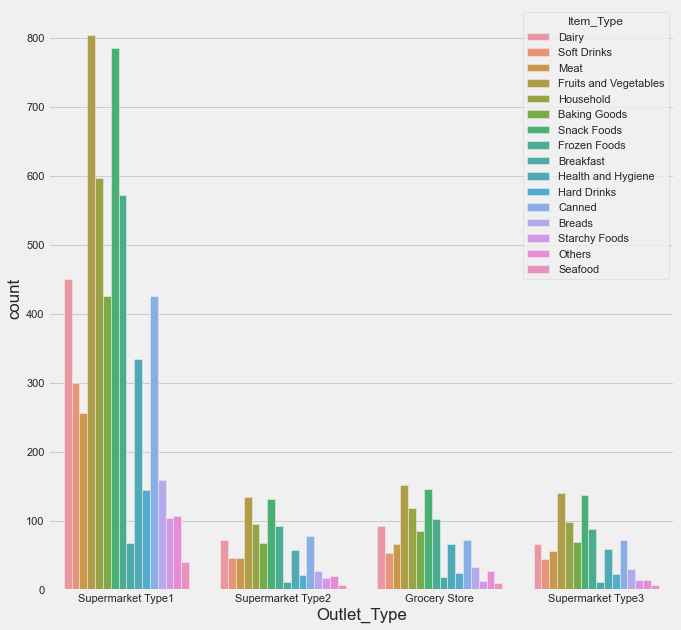

In [28]:
plt.figure(figsize=(10,10))
sns.countplot(x ='Outlet_Type',hue='Item_Type', data = train)

## Corelation Matrix

In [33]:
#Correlation between Numerical Predictors and Target variable
corr = train.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


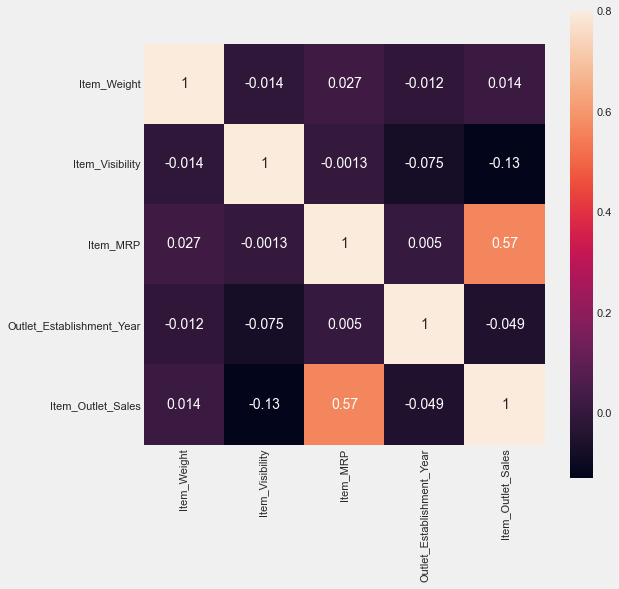

In [34]:
#using Heat Map
#correlation matrix
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr, vmax=.8, square=True,annot=True);

##### There is corelationship between item_mrp and sales to some extent
##### 

##### Lowest Corealtion - Item Visibility